Accuracy: 0.95


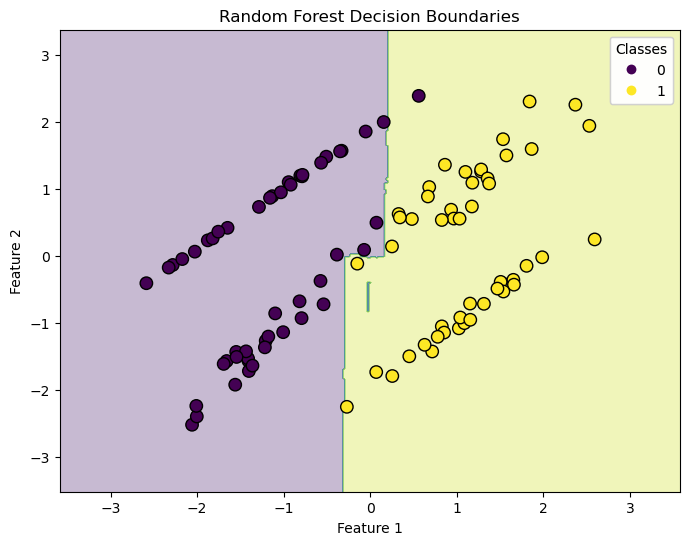

Decision Tree Rules:
|--- Feature 2 <= 1.65
|   |--- Feature 1 <= -0.31
|   |   |--- class: 0.0
|   |--- Feature 1 >  -0.31
|   |   |--- class: 1.0
|--- Feature 2 >  1.65
|   |--- Feature 2 <= 1.97
|   |   |--- class: 1.0
|   |--- Feature 2 >  1.97
|   |   |--- class: 0.0



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text

# Generate synthetic dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Visualize the decision boundaries
def plot_decision_boundary(X, y, model, ax):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=80, linewidth=1)
    legend = ax.legend(*scatter.legend_elements(), title="Classes")
    ax.add_artist(legend)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plot_decision_boundary(X, y, rf_classifier, plt.gca())
plt.title('Random Forest Decision Boundaries')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Display the first decision tree in the forest
tree_rules = export_text(rf_classifier.estimators_[0], feature_names=['Feature 1', 'Feature 2'])
print(f"Decision Tree Rules:\n{tree_rules}")


Accuracy: 0.77


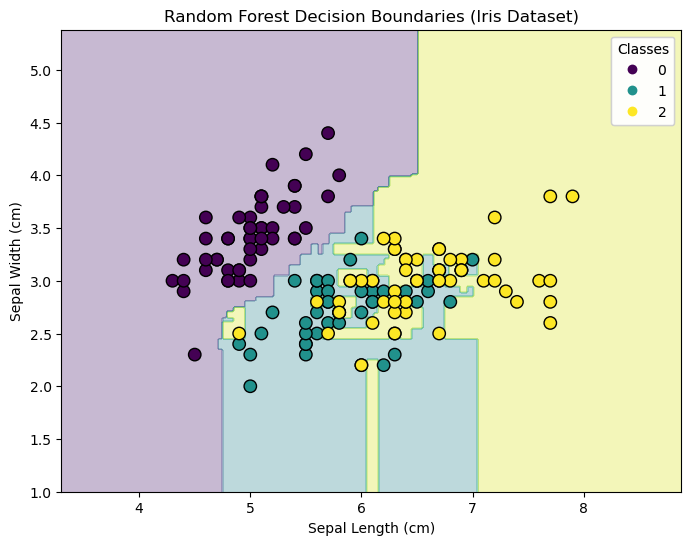

Decision Tree Rules:
|--- Sepal Width <= 3.35
|   |--- Sepal Length <= 5.05
|   |   |--- Sepal Width <= 2.70
|   |   |   |--- Sepal Width <= 2.40
|   |   |   |   |--- Sepal Length <= 4.75
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- Sepal Length >  4.75
|   |   |   |   |   |--- class: 1.0
|   |   |   |--- Sepal Width >  2.40
|   |   |   |   |--- class: 2.0
|   |   |--- Sepal Width >  2.70
|   |   |   |--- class: 0.0
|   |--- Sepal Length >  5.05
|   |   |--- Sepal Length <= 5.75
|   |   |   |--- class: 1.0
|   |   |--- Sepal Length >  5.75
|   |   |   |--- Sepal Width <= 3.25
|   |   |   |   |--- Sepal Width <= 3.15
|   |   |   |   |   |--- Sepal Length <= 5.95
|   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |   |--- Sepal Length >  5.95
|   |   |   |   |   |   |--- Sepal Length <= 7.05
|   |   |   |   |   |   |   |--- Sepal Width <= 2.70
|   |   |   |   |   |   |   |   |--- Sepal Length <= 6.20
|   |   |   |   |   |   |   |   |   |--- Sepal Length <= 6.05
|   |   |

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text

# Load the Iris dataset
iris = load_iris()
X, y = iris.data[:, :2], iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Visualize the decision boundaries
def plot_decision_boundary(X, y, model, ax):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=80, linewidth=1)
    legend = ax.legend(*scatter.legend_elements(), title="Classes")
    ax.add_artist(legend)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plot_decision_boundary(X, y, rf_classifier, plt.gca())
plt.title('Random Forest Decision Boundaries (Iris Dataset)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

# Display the first decision tree in the forest
tree_rules = export_text(rf_classifier.estimators_[0], feature_names=['Sepal Length', 'Sepal Width'])
print(f"Decision Tree Rules:\n{tree_rules}")


Accuracy: 0.89


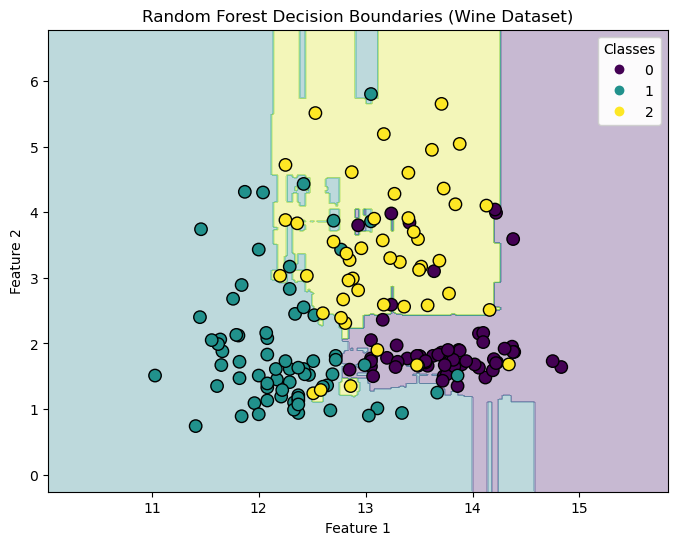

Decision Tree Rules:
|--- Feature 2 <= 2.93
|   |--- Feature 1 <= 13.04
|   |   |--- Feature 2 <= 2.24
|   |   |   |--- Feature 2 <= 1.36
|   |   |   |   |--- Feature 2 <= 1.34
|   |   |   |   |   |--- Feature 1 <= 12.47
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- Feature 1 >  12.47
|   |   |   |   |   |   |--- Feature 1 <= 12.62
|   |   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |   |   |--- Feature 1 >  12.62
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- Feature 2 >  1.34
|   |   |   |   |   |--- class: 2.0
|   |   |   |--- Feature 2 >  1.36
|   |   |   |   |--- class: 1.0
|   |   |--- Feature 2 >  2.24
|   |   |   |--- Feature 2 <= 2.38
|   |   |   |   |--- class: 2.0
|   |   |   |--- Feature 2 >  2.38
|   |   |   |   |--- Feature 2 <= 2.68
|   |   |   |   |   |--- Feature 1 <= 12.61
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- Feature 1 >  12.61
|   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |--- Feature 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text

# Load the Wine dataset
wine = load_wine()
X, y = wine.data[:, :2], wine.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Visualize the decision boundaries
def plot_decision_boundary(X, y, model, ax):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=80, linewidth=1)
    legend = ax.legend(*scatter.legend_elements(), title="Classes")
    ax.add_artist(legend)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plot_decision_boundary(X, y, rf_classifier, plt.gca())
plt.title('Random Forest Decision Boundaries (Wine Dataset)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Display the first decision tree in the forest
tree_rules = export_text(rf_classifier.estimators_[0], feature_names=['Feature 1', 'Feature 2'])
print(f"Decision Tree Rules:\n{tree_rules}")


Accuracy: 0.89


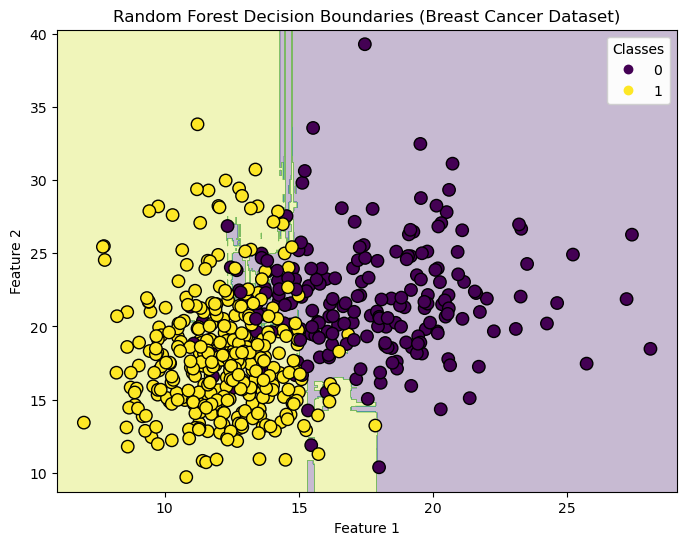

Decision Tree Rules:
|--- Feature 2 <= 18.69
|   |--- Feature 1 <= 14.93
|   |   |--- Feature 2 <= 15.53
|   |   |   |--- class: 1.0
|   |   |--- Feature 2 >  15.53
|   |   |   |--- Feature 2 <= 15.58
|   |   |   |   |--- class: 0.0
|   |   |   |--- Feature 2 >  15.58
|   |   |   |   |--- Feature 2 <= 16.89
|   |   |   |   |   |--- Feature 1 <= 12.47
|   |   |   |   |   |   |--- Feature 1 <= 12.38
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- Feature 1 >  12.38
|   |   |   |   |   |   |   |--- Feature 2 <= 16.05
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- Feature 2 >  16.05
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- Feature 1 >  12.47
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- Feature 2 >  16.89
|   |   |   |   |   |--- Feature 2 <= 16.94
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- Feature 2 >  16.94
|   |   |   |   |   |   |--- Feature 1 <= 11.78
|   |  

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data[:, :2], cancer.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Visualize the decision boundaries
def plot_decision_boundary(X, y, model, ax):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=80, linewidth=1)
    legend = ax.legend(*scatter.legend_elements(), title="Classes")
    ax.add_artist(legend)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plot_decision_boundary(X, y, rf_classifier, plt.gca())
plt.title('Random Forest Decision Boundaries (Breast Cancer Dataset)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Display the first decision tree in the forest
tree_rules = export_text(rf_classifier.estimators_[0], feature_names=['Feature 1', 'Feature 2'])
print(f"Decision Tree Rules:\n{tree_rules}")
